In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from IPython.display import display

# Барьерные опционы

Пример 1. Оцените стоимость опциона down-and-in колл с датой экспирации через 6 месяцев, если текущая стоимость акции 100, волатильность акции 30\%, барьер 100, цена страйк 90, компенсационная выплата 3. Безрисковая ставка 8\%, стоимость переноса позиции 4\%.

In [2]:
S = 100
H = 100
K = 90
R = 3
T = 0.5
r = 0.08
b = 0.04
q = r - b
sigma = 0.3

In [3]:
def call_di(S, H, K, T, r, q, sigma):
  if S > H:
    return C + E
  else:
    return A - B + D + E

# down-and-in call
eta = 1
phi = 1

mu = (b-sigma**2/2)/sigma**2
lam = np.sqrt(mu**2 + 2*r/sigma**2)

x1 = np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
x2 = np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

y1 = np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
y2 = np.log(H/S)/sigma/np.sqrt(T)      + (1 + mu)*sigma*np.sqrt(T)

z = np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

A = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x1-phi*sigma*np.sqrt(T))

B = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x2-phi*sigma*np.sqrt(T))

C = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y1-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

D = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y2-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

E = R*np.exp(-r*T)*(norm.cdf(eta*x2-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2-eta*sigma*np.sqrt(T)))

F = R*((H/S)**(mu+lam)*norm.cdf(eta*z)+(H/S)**(mu-lam)*norm.cdf(eta*z - 2*eta*lam*sigma*np.sqrt(T)))


print('down-and-in call = ', call_di(S, H, K, T, r, q, sigma))

down-and-in call =  14.88162080496874


В условиях примера 1 напишите универсальную функцию для оценки стоимости 8 видов  барьерных опционов. Для проверки результатов использовать таблицу:
\
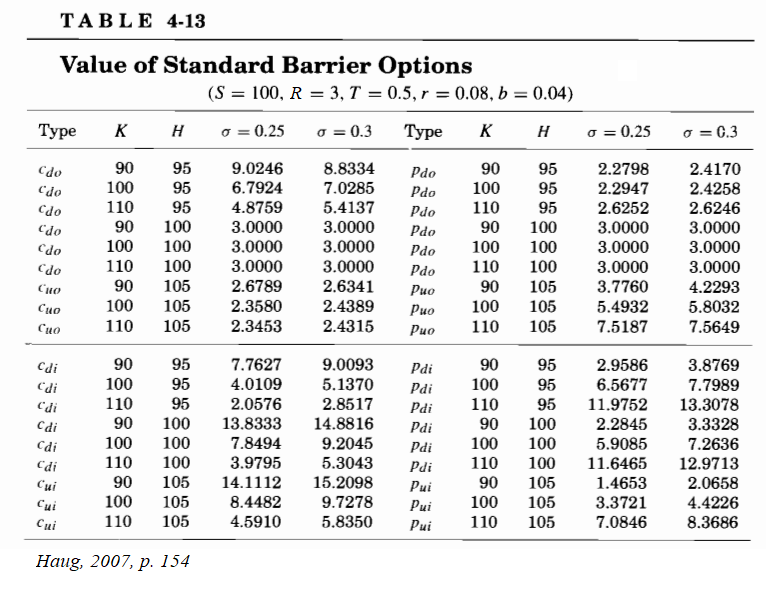

In [44]:
def x1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def x2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def z(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

def A(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def B(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def C(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def D(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def E(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*np.exp(-r*T)*(norm.cdf(eta*x2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T)))

def F(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*((H/S)**(mu+lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta))+(H/S)**(mu-lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta) - 2*eta*lam*sigma*np.sqrt(T)))

def di_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def di_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = -1
        phi = -1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
###
def do_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def do_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call):
    if option_type == "Up-and-out" and is_call == True:
        exact_calc_result = uo_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-out" and is_call == False:
        exact_calc_result = uo_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == True:
        exact_calc_result = do_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == False:
        exact_calc_result = do_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == True:
        exact_calc_result = ui_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == False:
        exact_calc_result = ui_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == True:
        exact_calc_result = di_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == False:
        exact_calc_result = di_barrier_put(S, H, K, R, T, r, b, sigma)
    else:
        print("Unknown option type")
        return
    return exact_calc_result

In [5]:
K = 90
H = 95
sigma = 0.25
S = 100
T = 0.5
R = 3
b = 0.04
r = 0.08
option_type = "Down-and-out"
is_call = True
barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call)

np.float64(9.02456769496686)

## Задача 1

Задача. Проварьируйте переменные $H$, $K$, $\sigma$, типы опционов и
*   постройте таблицу 4-13 ([Haug, 2007](https://drive.google.com/file/d/1yxjRkchVqvl2xkQFyeB2BKNQ1SKJSTtK/view?usp=sharing)),
*   постройте поверхности для различных $K=\{90, 100, 110\}$, $H=\{95, 100, 105\}$ и $\sigma=0.3$.

In [59]:
def calculate_barrier_options_fixed(S, T, R, b, r, option_type_list, H_list, K_list, sigma_list, is_call_list):
    results = []
    
    for option_type in option_type_list:
        for H in H_list:
            for K in K_list:
                for sigma in sigma_list:
                    for is_call in is_call_list:
                        try:
                            price = barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call)
                        except Exception as e:
                            price = None  
                        
                        results.append({
                            "Option Type": type_labels[(option_type, is_call)],
                            "H": H,
                            "K": K,
                            "sigma": sigma,
                            "Is Call": is_call,
                            "Price": price
                        })
    return pd.DataFrame(results)

S = 100
T = 0.5
R = 3
b = 0.04
r = 0.08

type_labels = {
    ("Down-and-out", True): "c_Do",
    ("Down-and-out", False): "p_Do",
    ("Up-and-out", True): "c_Uo",
    ("Up-and-out", False): "p_Uo",
    ("Down-and-in", True): "c_Di",
    ("Down-and-in", False): "p_Di",
    ("Up-and-in", True): "c_Ui",
    ("Up-and-in", False): "p_Ui",
}

H_list = [95, 100, 105]
K_list = [90, 100, 110]
sigma_list = [0.25, 0.3]
option_types = ["Down-and-out", "Up-and-out", "Down-and-in", "Up-and-in"]
is_call_values = [True, False]

#df_results = calculate_barrier_options_fixed(S, T, R, b, r, option_type_list, H_list, K_list, sigma_list, is_call_list)
#df_results = df_results.dropna(subset=['Price'])
df_call = df_results[df_results['Type'].str.startswith('c')].pivot_table(
    index=['Type', 'K', 'H'],
    columns='σ',
    values='Price',
    aggfunc=lambda x: round(x.mean(), 4) if x.notnull().all() else None
)

df_put = df_results[df_results['Type'].str.startswith('p')].pivot_table(
    index=['Type', 'K', 'H'],
    columns='σ',
    values='Price',
    aggfunc=lambda x: round(x.mean(), 4) if x.notnull().all() else None
)

In [61]:
df_call.head(9)

σ                 0.25     0.30
Type  K   H                    
c_Doi 90  95    7.7627   9.0093
          100  13.8333  14.8816
          105  22.4292  22.7016
      100 95    4.0109   5.1370
          100   7.8494   9.2045
          105  14.2751  15.3073
      110 95    2.0576   2.8517
          100   3.9795   5.3043
          105   8.2467   9.6968

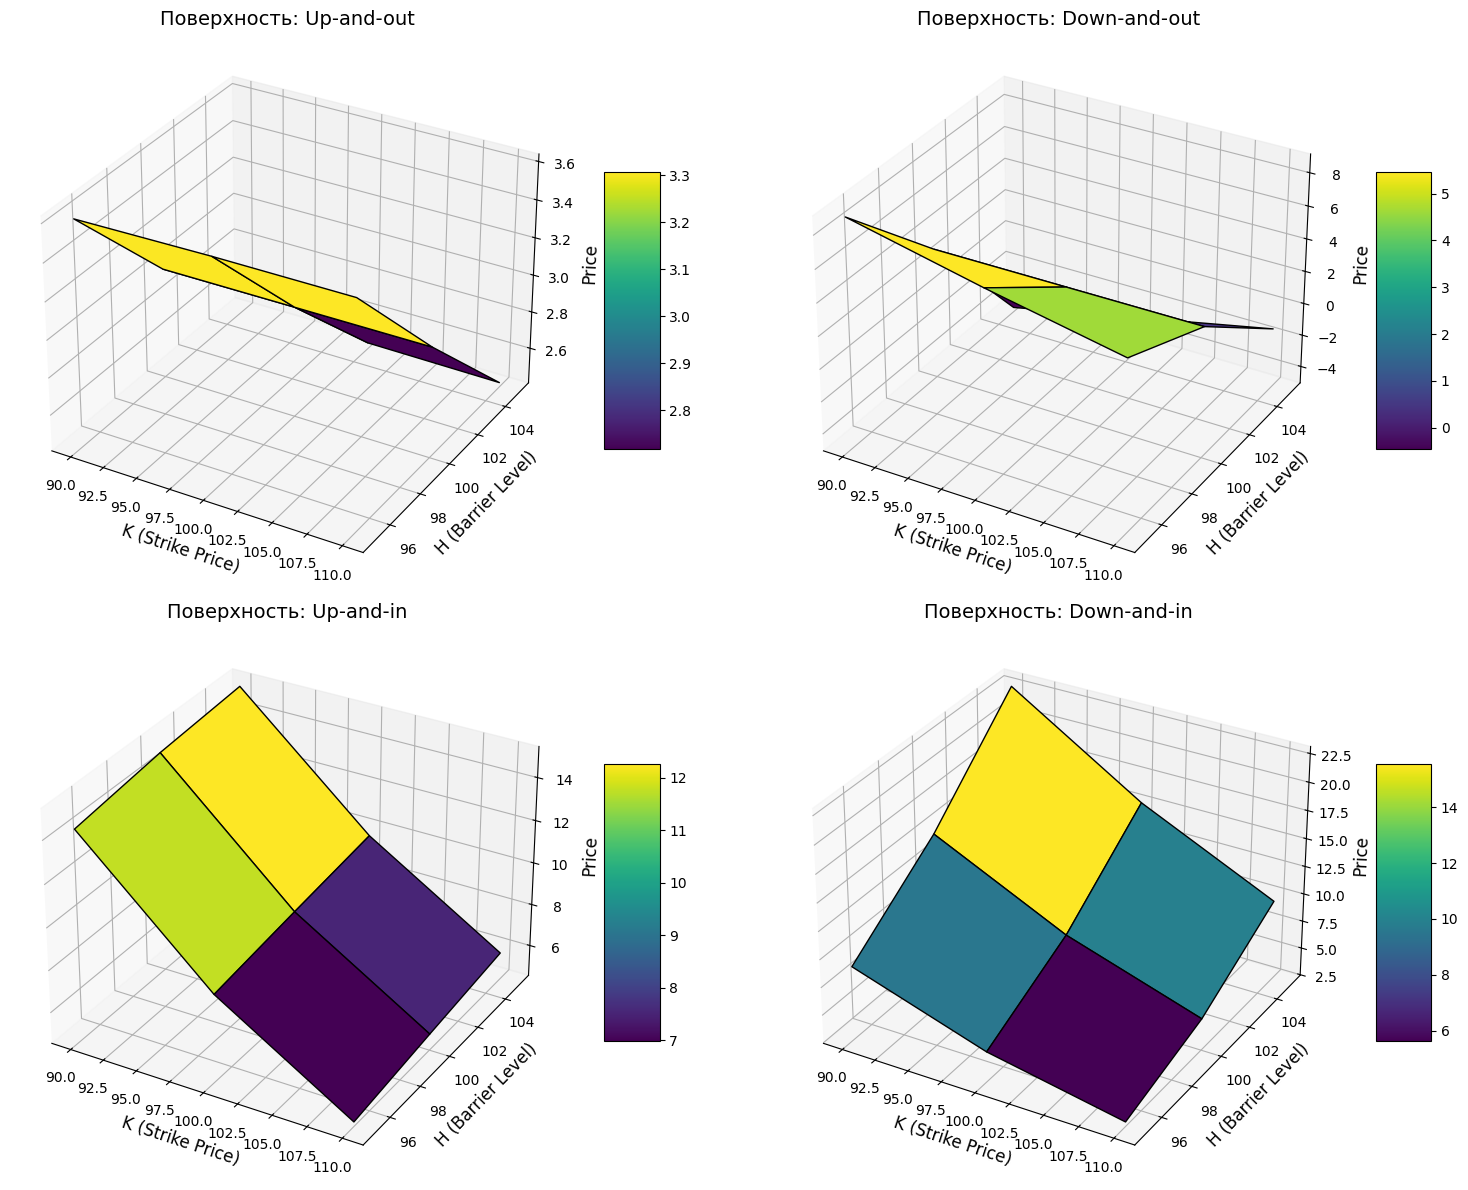

In [66]:
S = 100
T = 0.5
R = 3
b = 0.04
r = 0.08
sigma = 0.3  
K_values = [90, 100, 110]
H_values = [95, 100, 105]
option_types = ["Up-and-out", "Down-and-out", "Up-and-in", "Down-and-in"]
is_call = True


fig = plt.figure(figsize=(16, 12))

for i, option_type in enumerate(option_types):
    prices_matrix = np.array([
        [barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call) for K in K_values]
        for H in H_values
    ])
    
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    K_mesh, H_mesh = np.meshgrid(K_values, H_values)
    surf = ax.plot_surface(K_mesh, H_mesh, prices_matrix, cmap='viridis', edgecolor='k')
    ax.set_title(f"Поверхность: {option_type}", fontsize=14)
    ax.set_xlabel("K (Strike Price)", fontsize=12)
    ax.set_ylabel("H (Barrier Level)", fontsize=12)
    ax.set_zlabel("Price", fontsize=12)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

Для PUT ниже

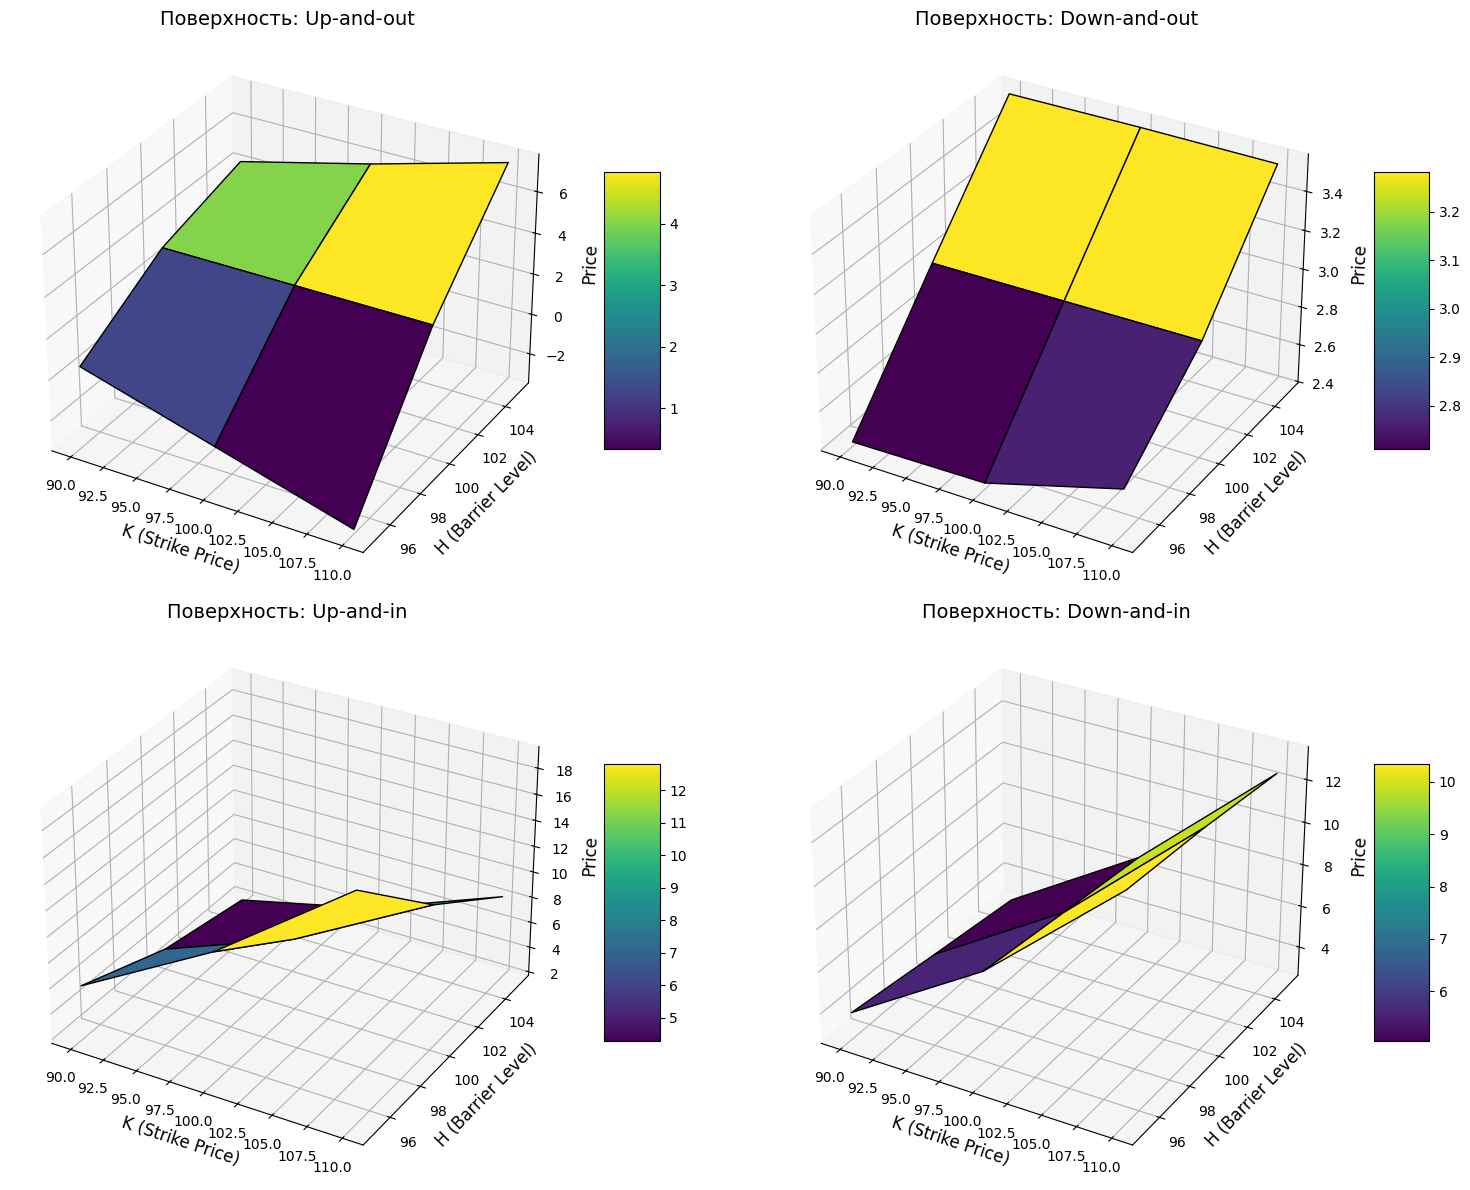

In [67]:
S = 100
T = 0.5
R = 3
b = 0.04
r = 0.08
sigma = 0.3  
K_values = [90, 100, 110]
H_values = [95, 100, 105]
option_types = ["Up-and-out", "Down-and-out", "Up-and-in", "Down-and-in"]
is_call = False


fig = plt.figure(figsize=(16, 12))

for i, option_type in enumerate(option_types):
    prices_matrix = np.array([
        [barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call) for K in K_values]
        for H in H_values
    ])
    
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    K_mesh, H_mesh = np.meshgrid(K_values, H_values)
    surf = ax.plot_surface(K_mesh, H_mesh, prices_matrix, cmap='viridis', edgecolor='k')
    ax.set_title(f"Поверхность: {option_type}", fontsize=14)
    ax.set_xlabel("K (Strike Price)", fontsize=12)
    ax.set_ylabel("H (Barrier Level)", fontsize=12)
    ax.set_zlabel("Price", fontsize=12)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

# Структурные продукты с полной защитой капитала

## СП с использованием барьерных опционов

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется
рост акции. Постройте структурный продукт с полной гарантией
возврата инвестированного капитала и использованием барьерных
опционов:

а) включаемый (knock-in) барьер 110 рублей, цена акции через год –
105 руб.,

б) выключаемый (knock-out) барьер 90 рублей, цена акции через год –
120 руб.

Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1
день.

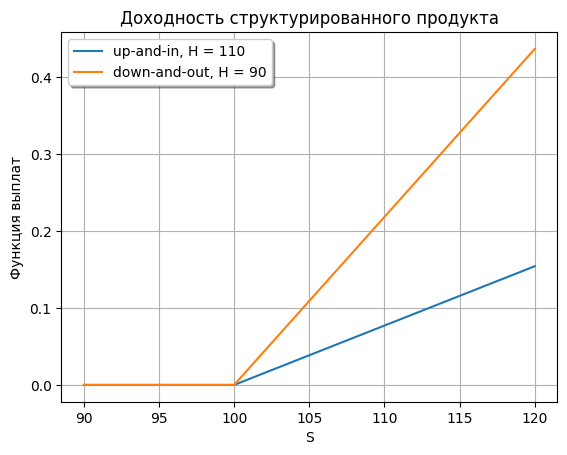

In [68]:
S0 = 100
T = 1
N = 100000
sigma = 0.3
r = 0.07
S_data = np.linspace(90, 120, 100)

H_1 = 110
K_1 = 105
option_type = 'Up-and-in'
is_call = True
call_1 = barrier_option(option_type, S0, H_1, K_1, 0, T, r, 0, sigma, is_call)

H_2 = 90
K_2 = 120
option_type = 'Down-and-out'
is_call = True
call_2 = barrier_option(option_type, S0, H_2, K_2, 0, T, r, 0, sigma, is_call)

capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

Q_1 = (N - da) / call_1
PR_1 = K_1 * Q_1/ N
r_sp_1 = np.maximum(r_sp_min, r_sp_min + PR_1 *(S_data - S0) / S0 )

Q_2 = (N - da) / call_2
PR_2 = K_2 * Q_2/ N
r_sp_2 = np.maximum(r_sp_min, r_sp_min + PR_2 *(S_data - S0) / S0 )

plt.plot(S_data, r_sp_1, label = 'up-and-in, H = 110')
plt.plot(S_data, r_sp_2, label = 'down-and-out, H = 90')
plt.title('Доходность структурированного продукта')
plt.xlabel('S')
plt.ylabel('Функция выплат')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)

## Задача

Задача. Постройте зависимость стоимости барьерного опциона (Knock-out call, Knock-in call, Knock-out put Knock-in put) от расположения барьера: x – это барьер в процентах от цены (50, 500), y - стоимость барьерного опциона в % от стоимости обычного call.

Постройте графики зависимость КоУ от расположения барьера относительно страйка для продуктов: с knock-out call, knock-in call и ванильный кол; с knock-out put, knock-in put и ванильный call.

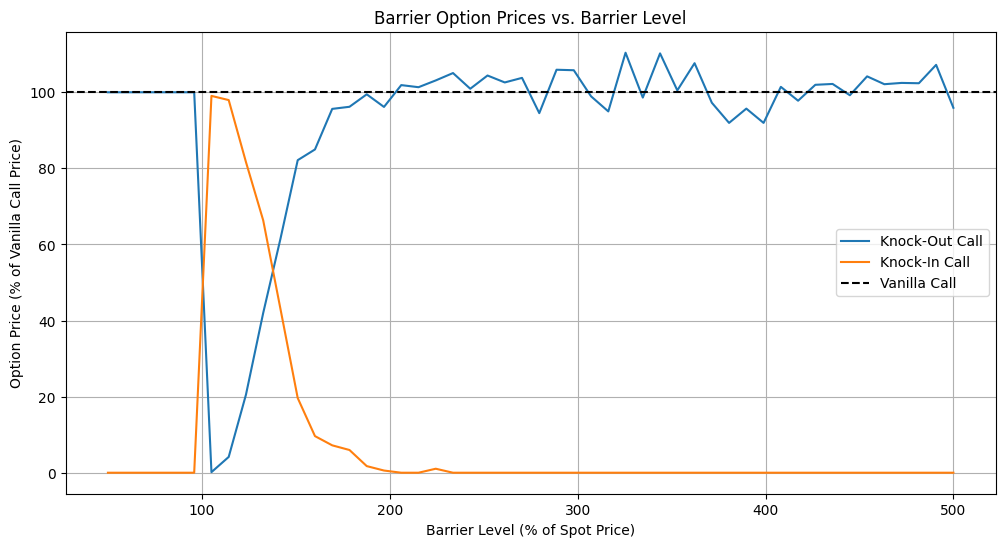

In [3]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt

S0 = 100       
K = 100         
r = 0.05      
sigma = 0.2    
T = 1.0      


def bs_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)


def knockout_call_monte_carlo(S0, K, T, r, sigma, H, N_simulations=1000):
    dt = T / 252  
    N_steps = int(T / dt)
    payoffs = []
    for _ in range(N_simulations):
        S = S0
        barrier_breached = False
        for _ in range(N_steps):
            Z = np.random.standard_normal()
            S *= np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
            if S >= H:
                barrier_breached = True
                break
        if not barrier_breached:
            payoffs.append(max(S - K, 0))
        else:
            payoffs.append(0)
    price = np.exp(-r * T) * np.mean(payoffs)
    return price


def knockin_call_monte_carlo(S0, K, T, r, sigma, H, N_simulations=1000):
    dt = T / 252  
    N_steps = int(T / dt)
    payoffs = []
    for _ in range(N_simulations):
        S = S0
        barrier_breached = False
        for _ in range(N_steps):
            Z = np.random.standard_normal()
            S *= np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
            if S >= H:
                barrier_breached = True
        if barrier_breached:
            payoffs.append(max(S - K, 0))
        else:
            payoffs.append(0)
    price = np.exp(-r * T) * np.mean(payoffs)
    return price


H_values = np.linspace(0.5 * S0, 5 * S0, 50)
vanilla_call_price = bs_call(S0, K, T, r, sigma)

knockout_prices = []
knockin_prices = []

for H in H_values:
    if H > S0:
        ko_price = knockout_call_monte_carlo(S0, K, T, r, sigma, H)
        ki_price = knockin_call_monte_carlo(S0, K, T, r, sigma, H)
        knockout_prices.append(ko_price / vanilla_call_price * 100)
        knockin_prices.append(ki_price / vanilla_call_price * 100)
    else:
        
        knockout_prices.append(100)
        knockin_prices.append(0)


plt.figure(figsize=(12, 6))
plt.plot(H_values / S0 * 100, knockout_prices, label='Knock-Out Call')
plt.plot(H_values / S0 * 100, knockin_prices, label='Knock-In Call')
plt.axhline(100, color='black', linestyle='--', label='Vanilla Call')
plt.xlabel('Barrier Level (% of Spot Price)')
plt.ylabel('Option Price (% of Vanilla Call Price)')
plt.title('Barrier Option Prices vs. Barrier Level')
plt.legend()
plt.grid(True)
plt.show()

# Торговая стратегия (индивидуально- по желанию)

## Проект

Задача. Торговая стратегия на основе опционного контракта Callable Bull or Bear Contract (CBBC).


[CBBC](https://https://www.hkex.com.hk/-/media/HKEX-Market/Products/Securities/Structured-Products/Product-Sheet/ProductSheet_CBBC.pdf) -- барьерный инструмент с эффектом рычага, в котором отслеживается цена базового актива.
Покупка (продажа) контракта Callable Bull (Bear) подразумевает, что инвестор занял длинную (короткую) позицию по базовому активу и имеет право на прибыль, когда стоимость этого актива вырастет (упадет).

Для контракта на повышение цены (Сallable Bull) цена включения (тригер) устанавливается либо на уровне цены страйка, либо выше. Обязательное событие включения (Mandatory Call Even, MCE) происходит, когда цена базового актива достигает цены тригера. Когда это происходит, торговля контрактом прекращается, сам контракт отзывается, и держатель контракта получает компенсацию в соответствии с заранее установленными условиями. Для контракта на понижение цены, цена включения (тригер) устанавливается либо на уровне цены страйка, либо ниже.

Разработайте торговую стратегию:
1.  Постройте прогноз дневных максимумов и минимумов для базового актива (например, через регрессию).
1.  Сигнал на покупку генерируется, когда прогнозируемый дневной максимум не ниже цены контракта.
1.  Купите базовый актив, когда сигнал на покупку наблюдается в течение $m$ последовательных дней.
1.  Закройте длинную позицию, когда сигнал на покупку исчезает в течение $m$ последовательных дней, происходит MCE или истекает срок действия контракта CBBC.
1.  Если позиция закрывается до MCE и срока действия контракта, то повторите шаги 2–4.

Проварьируйте параметр $m$ и проанализируейте P&L торговой стратегии.

[Исторические данные CBBC](https://www.hkex.com.hk/Products/Securities/Structured-Products/Trading-Information-and-Historical-Data?sc_lang=en)  

Статья ([Cheung et.al., 2010](https://www.sciencedirect.com/science/article/pii/S0927538X09000778?via%3Dihub)) или ([Cheung et.al., 2010](https://drive.google.com/file/d/1psFxTOZ8nf5IVuBcWKuKTEQ-JeJsRGPI/view?usp=drive_link))


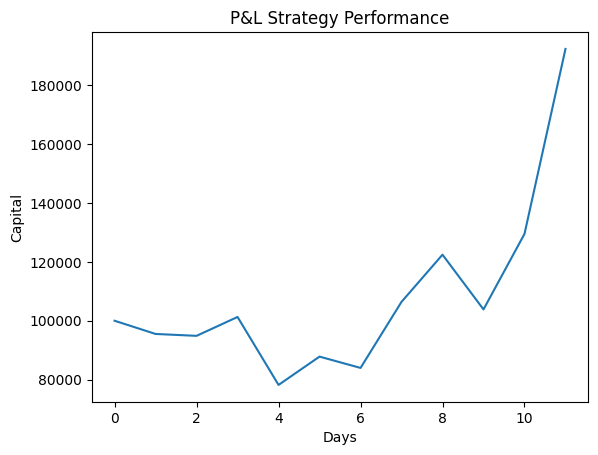

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv('dd.csv')  

def forecast_prices(data, window=1):
    forecasts = []
    for i in range(len(data) - window):
        X = np.arange(window).reshape(-1, 1)
        y_high = data['High'].iloc[i:i+window].values
        y_low = data['Low'].iloc[i:i+window].values
        
        model_high = LinearRegression().fit(X, y_high)
        model_low = LinearRegression().fit(X, y_low)
        
        forecast_high = model_high.predict([[window]])
        forecast_low = model_low.predict([[window]])
        
        forecasts.append((forecast_high[0], forecast_low[0]))
    
    return pd.DataFrame(forecasts, columns=['Forecast_High', 'Forecast_Low'])

forecast = forecast_prices(data)
data = data.iloc[5:].reset_index(drop=True)
data['Forecast_High'] = forecast['Forecast_High']
data['Forecast_Low'] = forecast['Forecast_Low']


capital = 100000  
position = 0  
t = 3  
strike_price = 0  
pnl = []

for i in range(len(data) - t):

    if data['Forecast_High'].iloc[i] >= strike_price and position == 0:
        position = capital // data['Close'].iloc[i]
        capital -= position * data['Close'].iloc[i]
    elif position > 0 and (i - t >= 0 and data['Forecast_High'].iloc[i] < strike_price):
        capital += position * data['Close'].iloc[i]
        position = 0

    current_value = capital + (position * data['Close'].iloc[i] if position > 0 else 0)
    pnl.append(current_value)


plt.plot(pnl)
plt.title('P&L Strategy Performance')
plt.xlabel('Days')
plt.ylabel('Capital')
plt.show()

In [17]:
data

,Date,High,Low,Close,Forecast_High,Forecast_Low
0,2024-10-24,0.165,0.157,0.156,0.147,0.147
1,2024-10-23,0.149,0.149,0.149,0.159,0.153
2,2024-10-22,0.158,0.145,0.148,0.153,0.148
3,2024-10-21,0.158,0.119,0.158,0.153,0.151
4,2024-10-18,0.153,0.121,0.122,0.158,0.148
5,2024-10-17,0.137,0.128,0.137,0.165,0.157
6,2024-10-16,0.160,0.127,0.131,0.149,0.149
7,2024-10-15,0.166,0.145,0.166,0.158,0.145
8,2024-10-14,0.191,0.179,0.191,0.158,0.119
9,2024-10-10,0.212,0.162,0.162,0.153,0.121


# Примеры на барьерные опционы

Zhang, c. 223

Пример 2.
Вычислите цену опциона down-and-in колл, если цена страйк  равна 98, цена исполнения через полгода 92. Цена акции 100, барьер 95, безрисковая ставка 8%, дивидендная доходность 3%, волатильность 20%.

Вычислить значение компенсационной выплаты по полугодовому барьерному опциону down-and-in колл на начальный момент, при условии, что эта выплата равна 1.5 на дату экспирации, если барьер не достигнут. Цена акции 100, барьер 95, волатильность 0.2, безрисковая ставка 0.08, дивидентная ставка 0.03.

In [ ]:
S = 100
H = 95
K = 98

T = 0.5
r = 0.08
q = 0.03
R_T = 1.5

sigma = 0.2

# if K = 98 > H = 95

d1 = (np.log(H**2/S/K) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = d1 + sigma * np.sqrt(T)
# print(d1);print(d2)

price_down_in_call = (H/S)**(2*(r-q-sigma**2/2)/sigma**2)*(H**2/S*np.exp(-q*T)*norm.cdf(d2)-K*np.exp(-r*T)*norm.cdf(d1))
print('price_down_in_call = ', price_down_in_call)

d1 = (np.log(S/H) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = (np.log(H/S) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))

R = R_T * np.exp(-r*T)*(norm.cdf(d1)- (H/S)**((2*0.03)/sigma**2)*norm.cdf(d2))
print('rebate = ', R)

price_down_in_call =  2.7338748685456857
rebate =  0.448464125401398


Задача. В условиях примера 2 вычислить стоимость опциона, если цена страйк 92 (ниже барьера).

In [ ]:
K = 92
call = barrier_option('Down-and-in',S, H, K, R, T, r, b, sigma, is_call=True)
print(f"call price = {call}")


call price = 4.892727517998941
